We're going to take another look into the k-means clusters that we found in a previous run. I'll be doing some of that work over again here in the interest of keeping it all in one place.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# setting the path to follow
path=r'C:\Users\evras\Desktop\Projects\Project A6'

In [3]:
#now the dataframe
df_bnb=pd.read_pickle(os.path.join(path,'01 Data','02 Altered','us_airbnb_2_states.pkl'))

In [4]:
df_bnb.head()

,listing_id,listing_name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,city,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listing_count,availability_365,state
0,38585,Charming Victorian home - twin beds + breakfast,165529,None,28804,35.65146,-82.62792,Asheville,Private room,60,1,138,16/02/20,1.14,1,0,North Carolina
1,80905,French Chic Loft,427027,None,28801,35.59779,-82.55540,Asheville,Entire home/apt,470,1,114,7/9/2020,1.03,11,288,North Carolina
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,None,28801,35.60670,-82.55563,Asheville,Entire home/apt,75,30,89,30/11/19,0.81,2,298,North Carolina
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,None,28806,35.57864,-82.59578,Asheville,Entire home/apt,90,1,267,22/09/20,2.39,5,0,North Carolina
4,160594,Historic Grove Park,769252,None,28801,35.61442,-82.54127,Asheville,Private room,125,30,58,19/10/15,0.52,1,0,North Carolina


# Prep
So I know a few things I want to narrow down right off the bat, specifically I need to narrow down the price range and the minimum rentable nights. Also I need to change minimum nights to minimum_rentable_nights so that it makes more sense.

In [5]:
df_bnb2=df_bnb.query('price >= 10 and price <= 3000 and minimum_nights <=365')

In [6]:
df_bnb2['price'].describe()

count    224966.000000
mean        192.391828
std         252.171205
min          10.000000
25%          75.000000
50%         120.000000
75%         200.000000
max        3000.000000
Name: price, dtype: float64

In [7]:
df_bnb2['minimum_nights'].describe()

count    224966.000000
mean          9.910275
std          21.132493
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max         365.000000
Name: minimum_nights, dtype: float64

Ok that all looks right for that part, next step is going to dropping a couple of columns. Specifically we'll be droping the two neighbourhood columns and the city column. The neighbourhood ones are inconsitent and city is occationally down right wrong. It lables a couple of *states* as cities, so that's not helpful.

In [8]:
df_bnb2=df_bnb2.drop(columns=['neighbourhood_group','neighbourhood','city','last_review'])

My next step is going to be seperating the frame into two different one. One with values that can be k-clustered and another with values that can not. This is so I can rejoin the two frames at the end and export them as a data set I can use to descover some other points with.

In [9]:
df_bnb2.columns.tolist()

['listing_id',
 'listing_name',
 'host_id',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'host_listing_count',
 'availability_365',
 'state']

In [10]:
df_cont=df_bnb2[['price','minimum_nights','number_of_reviews','reviews_per_month','host_listing_count','availability_365',]]

In [11]:
df_cont.head(5)

,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing_count,availability_365
0,60,1,138,1.14,1,0
1,470,1,114,1.03,11,288
2,75,30,89,0.81,2,298
3,90,1,267,2.39,5,0
4,125,30,58,0.52,1,0


In [12]:
df_cat=df_bnb2[['listing_id','listing_name','host_id','latitude','longitude','room_type','state']]

In [13]:
df_cat.head(5)

,listing_id,listing_name,host_id,latitude,longitude,room_type,state
0,38585,Charming Victorian home - twin beds + breakfast,165529,35.65146,-82.62792,Private room,North Carolina
1,80905,French Chic Loft,427027,35.59779,-82.55540,Entire home/apt,North Carolina
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,35.60670,-82.55563,Entire home/apt,North Carolina
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,35.57864,-82.59578,Entire home/apt,North Carolina
4,160594,Historic Grove Park,769252,35.61442,-82.54127,Private room,North Carolina


excellent, now we can move forward onto the clusterings!

# The Elbow and the K-means
it's not thief and the cobler but it's still fun

In [14]:
num_cl=range(1,10)

In [15]:
kmeans=[KMeans(n_clusters=i)for i in num_cl]

In [16]:
score=[kmeans[i].fit(df_cont).score(df_cont)for i in range(len(kmeans))]

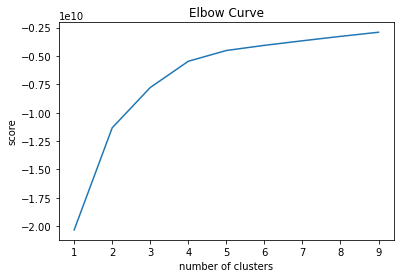

In [17]:
#now we'll plot out the test
pl.plot(num_cl,score)
pl.xlabel('number of clusters')
pl.ylabel('score')
pl.title('Elbow Curve')
pl.show()

In [18]:
#ok good, we got the same thing as last time. We're going to go with 5 clusters

## K-means

In [19]:
kmeans=KMeans(n_clusters=5,n_jobs=-1)

In [20]:
#fitting the model to the data
kmeans.fit(df_cont)

C:\Users\evras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

In [21]:
# here we're creating a row for the clusters to be tagged.
df_cont['clusters']=kmeans.fit_predict(df_cont)

C:\Users\evras\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-21-835e94b87ba3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont['clusters']=kmeans.fit_predict(df_cont)


In [22]:
df_cont.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing_count,availability_365,clusters
0,60,1,138,1.14,1,0,1
1,470,1,114,1.03,11,288,4
2,75,30,89,0.81,2,298,0
3,90,1,267,2.39,5,0,1
4,125,30,58,0.52,1,0,1


In [23]:
df_cont['clusters'].value_counts()

1    118356
0     74986
4     23892
2      6277
3      1455
Name: clusters, dtype: int64

Ok, everything looks good. Same clusters as before so we're good to move forward. Normally I would just go ahead and throw this onto some charts, however I'm going to bring the two sets back together and work from there.

In [24]:
#Since we never changed the order of anything, we can actually just merge them back together.
df_bnb3=df_cont.merge(df_cat, how='outer', left_index=True, right_index=True)

In [25]:
df_bnb3.columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'host_listing_count', 'availability_365', 'clusters', 'listing_id',
       'listing_name', 'host_id', 'latitude', 'longitude', 'room_type',
       'state'],
      dtype='object')

In [26]:
#for the sake of easy comparing, we're going to reorder them back to the way they were

In [27]:
df_bnb2.columns

Index(['listing_id', 'listing_name', 'host_id', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'host_listing_count', 'availability_365', 'state'],
      dtype='object')

In [28]:
df_bnb3=df_bnb3[['listing_id', 'listing_name', 'host_id', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'host_listing_count', 'availability_365', 'state','clusters']]

In [29]:
df_bnb3.head()

,listing_id,listing_name,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing_count,availability_365,state,clusters
0,38585,Charming Victorian home - twin beds + breakfast,165529,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,North Carolina,1
1,80905,French Chic Loft,427027,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,North Carolina,4
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,North Carolina,0
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,North Carolina,1
4,160594,Historic Grove Park,769252,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,North Carolina,1


In [30]:
df_bnb2.head()

,listing_id,listing_name,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing_count,availability_365,state
0,38585,Charming Victorian home - twin beds + breakfast,165529,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,North Carolina
1,80905,French Chic Loft,427027,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,North Carolina
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,North Carolina
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,North Carolina
4,160594,Historic Grove Park,769252,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,North Carolina


Now we can use this version of the data frame to compare all sorts of things!

# Data Diving

In [31]:
# I'm going to go ahead and do the aggrogation thing to take a look at the frame in a differnt light.
df_bnb3.groupby('clusters').agg({'price':['mean','median'],
                                'minimum_nights':['mean','median'],
                                'host_listing_count':['mean','median'],
                                'availability_365':['mean','median']})

price        minimum_nights        host_listing_count         \
                 mean median           mean median               mean median   
clusters                                                                       
0          131.057984    120      12.802270      3          27.932227      3   
1          114.558510    100       8.714007      2           8.337330      1   
2         1030.469014    999       7.558547      3          20.031862      2   
3         2195.694158   2000      10.693471      3          14.139519      2   
4          428.278503    400       7.329859      3          21.831450      2   

         availability_365         
                     mean median  
clusters                          
0              316.531806    336  
1               53.638050     21  
2              194.732356    214  
3              184.413058    180  
4              178.081031    178

In [32]:
#first let's set up a general size for the upcoming plots
plt.rcParams['figure.figsize']=[10,10]
plt.rcParams['figure.autolayout']=True

In [33]:
# uncomment the next line to ad interactivity (so fancy) just bear in mind it's rough on ram
#%matplotlib notebook

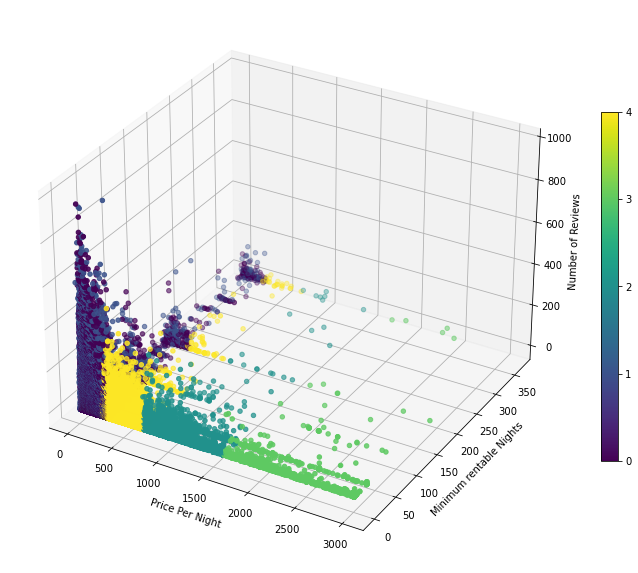

In [126]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Set1')
sc=ax.scatter(df_bnb3['price'],df_bnb3['minimum_nights'],df_bnb3['number_of_reviews'],c=df_bnb3['clusters'])
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3,4])

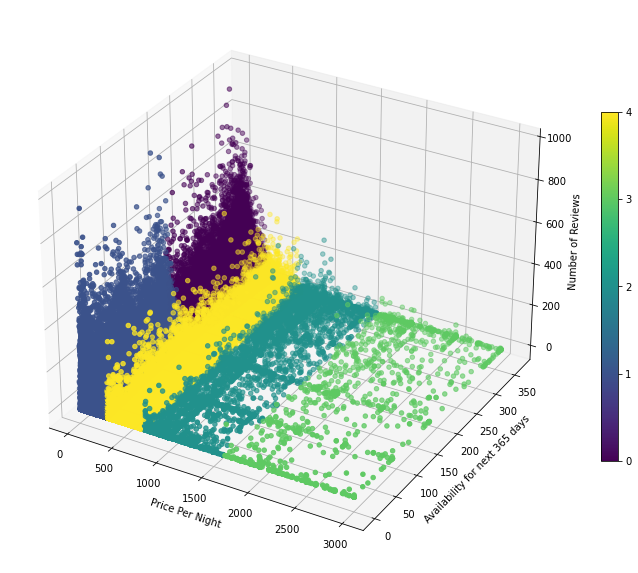

In [125]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Set1')
sc=ax.scatter(df_bnb3['price'],df_bnb3['availability_365'],df_bnb3['number_of_reviews'],c=df_bnb3['clusters'])
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Availability for next 365 days')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3,4])

In [149]:
# I'm going to go with mostly not. Given how mixed up it looks. Though obviously full home/apartment rentals reign over all.

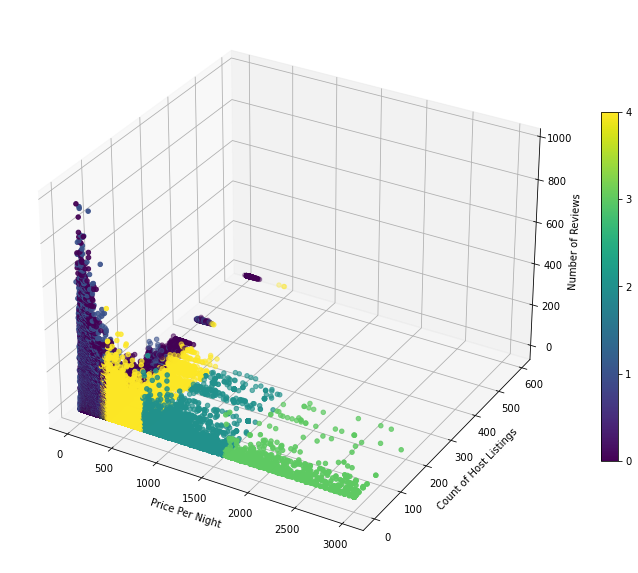

In [130]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Set1')
sc=ax.scatter(df_bnb3['price'],df_bnb3['host_listing_count'],df_bnb3['number_of_reviews'],c=df_bnb3['clusters'])
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Count of Host Listings')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3,4])

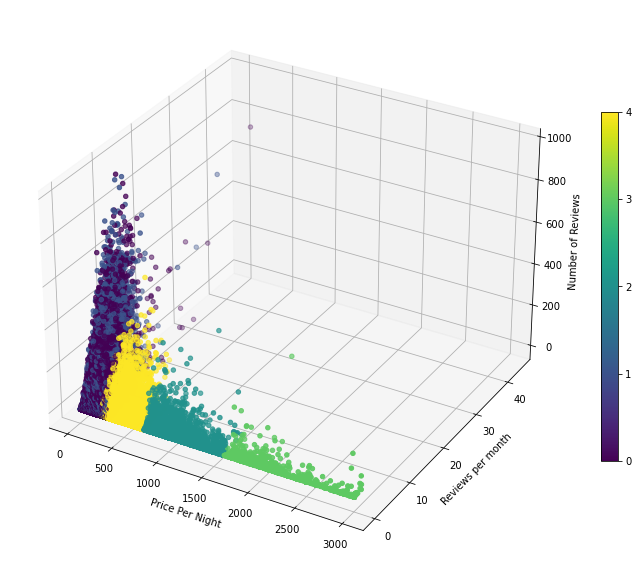

In [148]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Set1')
sc=ax.scatter(df_bnb3['price'],df_bnb3['reviews_per_month'],df_bnb3['number_of_reviews'],c=df_bnb3['clusters'])
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Reviews per month')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3,4])
#ax.view_init(45,360)

Something that I think is interesting here is the that two clusters occupy almost the exact same space, where as the others all seem to exist in thier own thresholds largely defined by price. While I would expect price to be the deliniating facrot between all of them, it might be something else. The most impactful other piece of data I have asside from location is that of room type. So the next step will be to seperate the clusters into their own frames, then use the room type as a means of color coding the data points. This will let us see if _that_ had a meaningful impact on the groupings. Which should in turn tells us something about the data.

In [35]:
#In order to color things by room count I need to assign a numerical tag to them.
df_bnb3['room_type'].value_counts()

Entire home/apt    153304
Private room        65753
Shared room          4020
Hotel room           1889
Name: room_type, dtype: int64

In [36]:
# Entire home/apt will be 0
df_bnb3.loc[df_bnb3['room_type']=='Entire home/apt', 'room_tag']=0
# Private room will be 1
df_bnb3.loc[df_bnb3['room_type']=='Private room', 'room_tag']=1
#Shared room is 2
df_bnb3.loc[df_bnb3['room_type']=='Shared room', 'room_tag']=2
# Hotel room is 3
df_bnb3.loc[df_bnb3['room_type']=='Hotel room', 'room_tag']=3

In [37]:
#now we just compare values
df_bnb3['room_tag'].value_counts()

0.0    153304
1.0     65753
2.0      4020
3.0      1889
Name: room_tag, dtype: int64

In [38]:
#looks good there, now we can use it in the color scheme

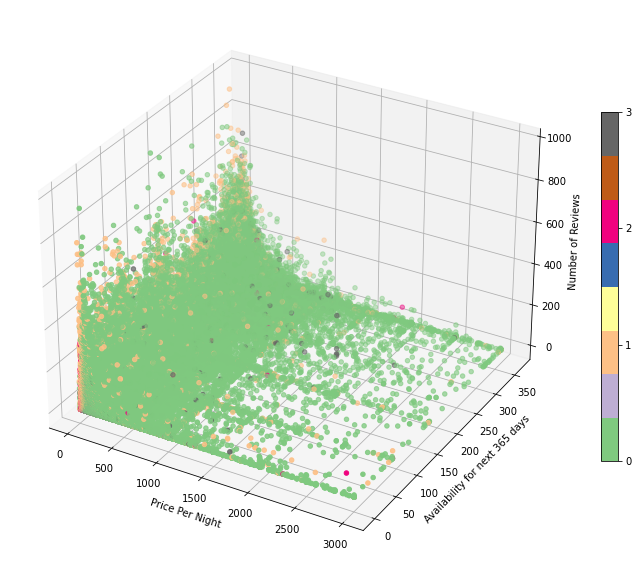

In [153]:
# Ok, so the clearest seperation comes from comparing price, availability, and number of reviews (which is sort of stand in for rentals)
# let's see if room type has any clear connections here
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb3['price'],df_bnb3['availability_365'],df_bnb3['number_of_reviews'],c=df_bnb3['room_tag'],cmap=my_cmap)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Availability for next 365 days')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3,4])

In [39]:
# Now that we have that sorted out, I'll break the df into it's clusters and we'll look at things from there
# First I'll do a count so I can compare them once we're done.
df_bnb3['clusters'].value_counts().sort_index(ascending=True)

0     74986
1    118356
2      6277
3      1455
4     23892
Name: clusters, dtype: int64

In [155]:
# ok, in the ineterst of not having these clusters move around on me, I'm going to export and start a new script for the visuals.
#df_bnb3.to_pickle(os.path.join(path,'01 Data','02 Altered','us_airbnb_3_clusters_rooms.pkl'))
# just incase I run this whole thing again at some point I don't want it overwriting the export...